## **Importing Libraries**

In [1]:
import os
import cv2
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__



'2.15.0'

## **Loading Images**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path ='/content/drive/MyDrive/Meat quality Test.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

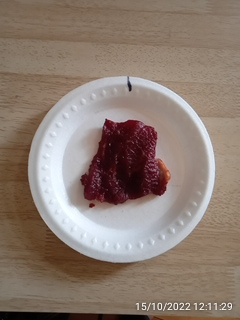

In [4]:
tf.keras.preprocessing.image.load_img('/content/Meat quality Test/test/fresh/Fresh (1010).jpg')

## **Train and Test Set**

In [5]:
training_gen =ImageDataGenerator(
    rescale=1./255, # Normalizing Image
    zoom_range=0.2, # increase or decrease Zoom of images
    horizontal_flip=True, # flip images
    rotation_range=8 # rotate image
)

In [6]:
train_dataset= training_gen.flow_from_directory(
    '/content/Meat quality Test/train',
    target_size=(66,66),
    batch_size=9,
    class_mode='categorical',
    shuffle = True
)

Found 2288 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'fresh': 0, 'rotten': 1}

In [8]:
test_gen = ImageDataGenerator(rescale=1./255)

In [9]:
test_dataset=test_gen.flow_from_directory('/content/Meat quality Test/test',
                                               target_size=(66,66),
                                               batch_size=1,
                                               class_mode='categorical',
                                               shuffle = False)

Found 980 images belonging to 2 classes.


## **Build and Train Neural Network**

In [ ]:
(1224+2)/2

613.0

In [10]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=33, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=34, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=613, activation='relu'))
network.add(Dense(units=613, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

network.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 33)        9537      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 33)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 34)        10132     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 34)          0

In [11]:
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history= network.fit_generator(train_dataset, epochs=50)

<ipython-input-12-a0b5d4a80f40>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= network.fit_generator(train_dataset, epochs=50)


Epoch 1/50
255/255 [==============================] - 118s 458ms/step - loss: 0.2634 - accuracy: 0.8842
Epoch 2/50
255/255 [==============================] - 108s 424ms/step - loss: 0.1009 - accuracy: 0.9659
Epoch 3/50
255/255 [==============================] - 111s 436ms/step - loss: 0.1001 - accuracy: 0.9628
Epoch 4/50
255/255 [==============================] - 108s 422ms/step - loss: 0.0724 - accuracy: 0.9729
Epoch 5/50
255/255 [==============================] - 108s 423ms/step - loss: 0.0790 - accuracy: 0.9707
Epoch 6/50
255/255 [==============================] - 110s 431ms/step - loss: 0.0791 - accuracy: 0.9725
Epoch 7/50
255/255 [==============================] - 110s 433ms/step - loss: 0.0447 - accuracy: 0.9821
Epoch 8/50
255/255 [==============================] - 108s 422ms/step - loss: 0.0736 - accuracy: 0.9742
Epoch 9/50
255/255 [==============================] - 111s 436ms/step - loss: 0.0439 - accuracy: 0.9838
Epoch 10/50
255/255 [==============================] - 109s 429m

## **Evaluting Neural Network**

In [13]:
test_dataset.class_indices

{'fresh': 0, 'rotten': 1}

In [14]:
predictions= network.predict(test_dataset)

980/980 [==============================] - 67s 68ms/step


In [64]:
predictions= np.argmax(predictions, axis=1) # use to extract the index of  the maximum value
predictions

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes,predictions)

0.9734693877551021

<Axes: >

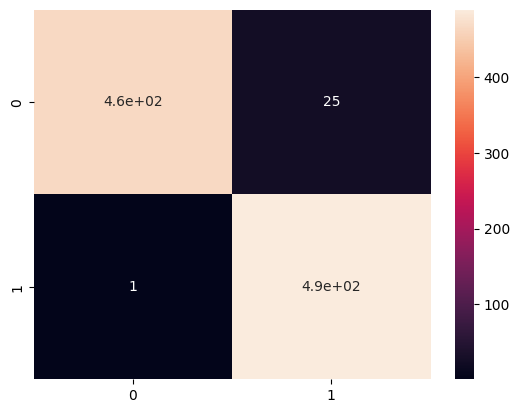

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       490
           1       0.95      1.00      0.97       490

    accuracy                           0.97       980
   macro avg       0.97      0.97      0.97       980
weighted avg       0.97      0.97      0.97       980



## **Saving and Loading Model**

In [19]:
model_json = network.to_json()
with open("Meat Quality", "w") as json_file:
    json_file.write(model_json)

In [20]:
from keras.models import save_model
Network_saved = save_model(network, 'Network_weights.hdf5')

<ipython-input-20-ae27a1c64c92>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  Network_saved = save_model(network, 'Network_weights.hdf5')


In [21]:
with open('Meat Quality') as json_file:
  json_file_loaded = json_file.read()
json_file_loaded

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bia

In [22]:
network_loaded= tf.keras.models.model_from_json(json_file_loaded)
network_loaded.load_weights('Network_weights.hdf5')
network_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 33)        9537      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 33)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 34)        10132     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 34)          0

## **Classifying A Single Image**

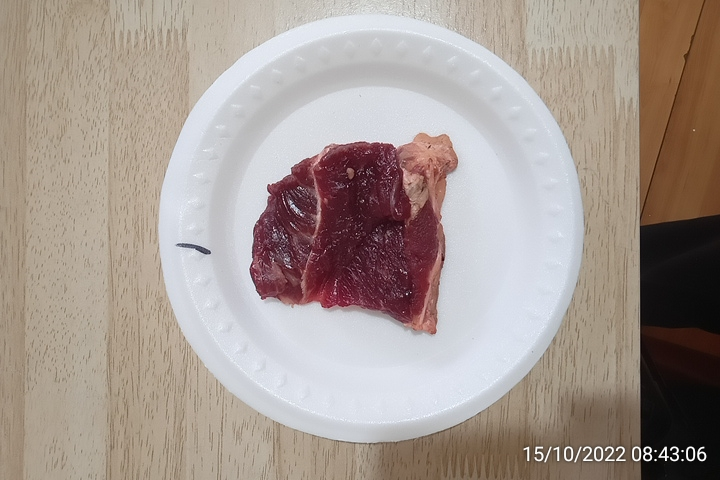

In [56]:
image_path = '/content/Meat quality Test/test/fresh/Fresh (302).jpg'

# Try to load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Failed to load image at {image_path}")
else:
    # Display the image using cv2_imshow
    cv2_imshow(image)

In [57]:
image.shape

(480, 720, 3)

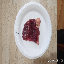

(64, 64, 3)

In [58]:
image= cv2.resize(image,(64,64))
cv2_imshow(image)
image.shape

In [59]:
image= image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [60]:
result = network_loaded.predict(image)
result

1/1 [==============================] - 0s 27ms/step


array([[0., 1.]], dtype=float32)

In [61]:
result = np.argmax(result)
result

1

In [62]:
test_dataset.class_indices

{'fresh': 0, 'rotten': 1}

In [63]:
if result == 0:
  print('Fresh')
else:
  print('Rotten')

Rotten
